In [6]:
import numpy as np
import matplotlib.pyplot as plt #
from sklearn.cluster import KMeans
import pandas as pd
import seaborn
from sklearn.preprocessing import MinMaxScaler
data=pd.read_excel(r"..\..\dataset\AHAH\AHAH_V3_preprocessed.xlsx")
print(data)
community_code=data["lsoa11"]

data.set_index("lsoa11",inplace=True)
xticklabels=data.columns

data_input=[]
#1-5 health,6-8 environment,9-13 retail,other air
for index, row in data.iterrows():
    data_input.append(row.iloc[0:5])


         lsoa11     ah3gp  ah3dent   ah3phar   ah3hosp   ah3leis   ah3blue  \
0     E01000001  2.106000   0.4000  0.561600  0.492000  0.287474  2.875774   
1     E01000002  3.146895   0.8875  0.879179  1.448895  0.818300  2.936500   
2     E01000003  1.151000   0.0000  0.347500  0.649500  0.369600  3.272200   
3     E01000005  1.462800   0.5650  0.942600  1.224050  0.522150  2.095000   
4     E01000006  1.585000   2.1500  1.867500  1.585000  1.800000  2.794750   
...         ...       ...      ...       ...       ...       ...       ...   
4830  E01033742  1.633500   1.7310  0.837500  0.405000  3.762000  0.505000   
4831  E01033743  4.891750   2.7050  3.517750  4.891750  4.869250  2.075250   
4832  E01033744  0.547500   0.5475  0.848500  0.286250  2.713500  1.459750   
4833  E01033745  5.153500   2.9155  3.779500  5.036000  5.131000  0.457000   
4834  E01033746  0.619500   0.9635  0.627200  0.730750  1.162950  0.924000   

       ah3gpas      ah3g  ah3ffood  ah3gamb     ah3off   ah3pub

In [7]:
data_input

[ah3gp      2.106000
 ah3dent    0.400000
 ah3phar    0.561600
 ah3hosp    0.492000
 ah3leis    0.287474
 Name: E01000001, dtype: float64,
 ah3gp      3.146895
 ah3dent    0.887500
 ah3phar    0.879179
 ah3hosp    1.448895
 ah3leis    0.818300
 Name: E01000002, dtype: float64,
 ah3gp      1.1510
 ah3dent    0.0000
 ah3phar    0.3475
 ah3hosp    0.6495
 ah3leis    0.3696
 Name: E01000003, dtype: float64,
 ah3gp      1.46280
 ah3dent    0.56500
 ah3phar    0.94260
 ah3hosp    1.22405
 ah3leis    0.52215
 Name: E01000005, dtype: float64,
 ah3gp      1.5850
 ah3dent    2.1500
 ah3phar    1.8675
 ah3hosp    1.5850
 ah3leis    1.8000
 Name: E01000006, dtype: float64,
 ah3gp      0.1775
 ah3dent    0.6475
 ah3phar    1.0775
 ah3hosp    0.5175
 ah3leis    1.1775
 Name: E01000007, dtype: float64,
 ah3gp      2.6410
 ah3dent    3.1110
 ah3phar    3.2585
 ah3hosp    2.8610
 ah3leis    3.6410
 Name: E01000008, dtype: float64,
 ah3gp      0.8050
 ah3dent    1.3700
 ah3phar    1.8675
 ah3hosp    0.8

[[3.8272721  3.71510134 3.16636161 4.44792881 6.92876184]
 [2.38835112 2.29025603 2.03263608 2.88495484 3.43468176]
 [1.37772202 1.2635769  1.19180509 1.47647705 1.569296  ]]


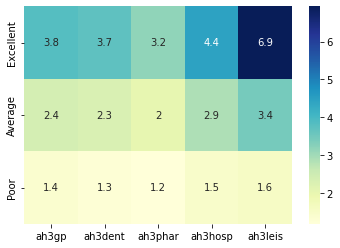

In [8]:
k = 3

kmodel = KMeans(n_clusters=k, init="random",
               max_iter=200, tol=1e-04)

# 训练模型
kmodel = kmodel.fit(data_input)
yticklabels=["Excellent","Average","Poor"]
print(kmodel.cluster_centers_)
health_center=[[1.37776803,1.26361429,1.19212573,1.47649188,1.56992386],
               [3.8272721,3.71510134,3.16636161,4.44792881,6.92876184],
               [2.38887628, 2.29080426, 2.03262818, 2.88576439, 3.43479577],

               ]
retail_center=[[ 2.54703145,2.80674873,23.59541074,2.89313568,5.5706339 ],
               [ 1.95651306,2.37796961,11.70649758,2.4054598,4.78673353],
               [ 1.24199941,1.71661593,4.94500339,1.36970161,2.98440331]
               ]
environment_center=[[ 6.55474166,0.37257457, 0.59301451],
                    [13.28837057,0.46272304,0.80729774],
                    [ 2.46468584,0.33803494,0.04038748]]
air_center=[[19.719983,1.67871189,16.98960086],
            [26.4595222,2.01803159,19.05143989],
            [34.74199511,2.44865425,20.12818536]]
seaborn.heatmap(kmodel.cluster_centers_,annot=True,cmap="YlGnBu",xticklabels=xticklabels[0:5],yticklabels=yticklabels)#这个函数是用来画簇中心点的热力图的
data["health_label"]=kmodel.labels_
#data.to_excel(r"..\..\dataset\AHAH\air_score.xlsx")
plt.show()